In [1]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

/home/tvangraft/tudelft/thesis/.env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 99%|===================| 32076/32561 [00:40<00:00]        

In [17]:
X.shape

(32561, 12)

In [20]:
shap_values

.values =
array([[ 0.62066666, -0.4340129 ,  0.40111691, ..., -0.11033077,
        -0.09677085,  0.01754525],
       [ 1.1341891 , -0.31901528,  0.59456015, ..., -0.18700682,
        -1.40943688,  0.01184286],
       [ 0.3439326 , -0.00987605, -0.36651412, ..., -0.12711806,
         0.02807141, -0.01081819],
       ...,
       [ 1.2399132 , -0.01095367, -0.26346212, ..., -0.13327572,
        -0.03201352,  0.03547605],
       [-1.89771601, -0.05581235, -0.34632427, ..., -0.17873634,
        -1.41615893, -0.01343117],
       [ 1.00243924,  0.14680661, -0.14676143, ..., -0.07620457,
         0.26474981,  0.01688919]])

.base_values =
array([-2.68469175, -2.68469175, -2.68469175, ..., -2.68469175,
       -2.68469175, -2.68469175])

.data =
array([[39.,  7., 13., ...,  0., 40., 39.],
       [50.,  6., 13., ...,  0., 13., 39.],
       [38.,  4.,  9., ...,  0., 40., 39.],
       ...,
       [58.,  4.,  9., ...,  0., 40., 39.],
       [22.,  4.,  9., ...,  0., 20., 39.],
       [52.,  5.,  9.,

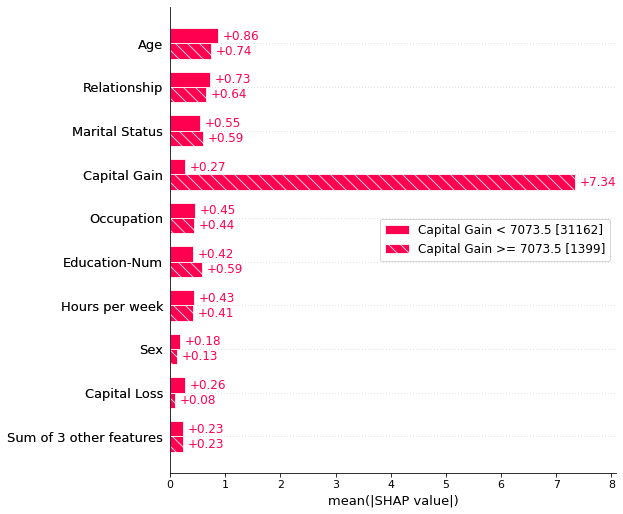

In [19]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

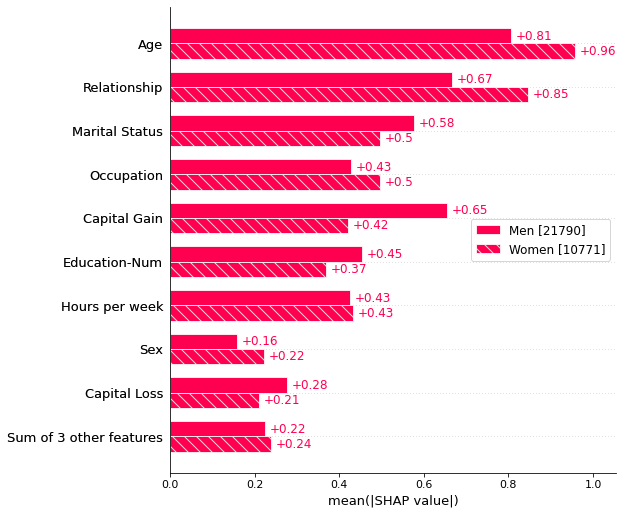

In [11]:
sex = ["Women" if shap_values[i,"Sex"].data == 0 else "Men" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))

In [ ]:
enzymes = [
    
]